<a href="https://colab.research.google.com/github/farrelrassya/teachingMLDL/blob/main/01.%20Machine%20Learning/02.%20Week%202/Notebook/RegresionBostonHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#data = load_boston()
#X = data.data
#y = data.target

#`load_boston` has been removed from scikit-learn since version 1.2.

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


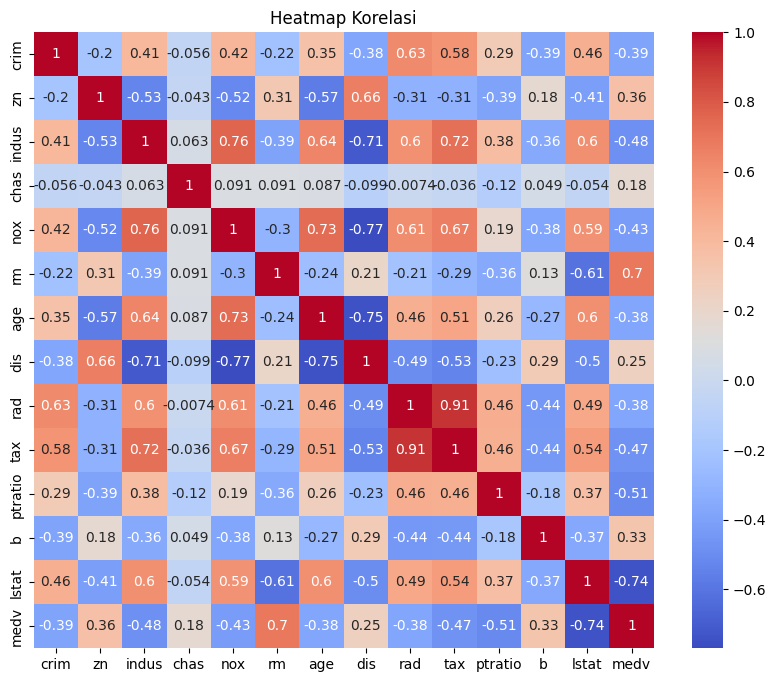

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

# Bikin heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()

$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

Penjelasan Lengkap Persamaan Korelasi Pearson:

1. Definisi:
   - $r$ adalah koefisien korelasi Pearson yang mengukur kekuatan dan arah hubungan linear antara dua variabel.
   - Nilai $r$ berkisar antara -1 (korelasi negatif sempurna) hingga 1 (korelasi positif sempurna), dengan $r = 0$ artinya tidak ada hubungan linear yang signifikan.

2. Numerator:
   - Numerator, yaitu $\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$, merupakan jumlah dari produk deviasi setiap nilai $x_i$ dan $y_i$ terhadap rata-rata masing-masing, $\bar{x}$ dan $\bar{y}$.
   - Jika nilai $x_i$ dan $y_i$ sama-sama di atas atau di bawah rata-rata, produk deviasinya positif, menandakan hubungan positif. Sebaliknya, jika salah satunya di atas dan yang lainnya di bawah rata-rata, produk deviasinya negatif, menandakan hubungan negatif.

3. Denumerator:
   - Denumerator adalah $\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}$.
   - Bagian ini menghitung total variasi masing-masing variabel dengan mengakumulasi kuadrat deviasi terhadap rata-rata, mengalikan kedua jumlah tersebut, lalu diakarkan. Ini menormalisasi nilai $r$, memastikan hasilnya selalu berada dalam rentang -1 sampai 1.

4. Interpretasi:
   - $r = 1$: Hubungan linear positif sempurna, artinya kenaikan $x$ selalu diiringi kenaikan $y$ secara proporsional.
   - $r = -1$: Hubungan linear negatif sempurna, artinya kenaikan $x$ diiringi penurunan $y$ secara proporsional.
   - $r = 0$: Tidak ada hubungan linear yang signifikan antara variabel.

5. Aplikasi:
   - Persamaan ini sering digunakan dalam statistik, machine learning, dan penelitian untuk mengevaluasi serta memahami hubungan antara variabel.
   - Normalisasi pada denumerator memastikan bahwa skala variabel tidak mempengaruhi besarnya koefisien korelasi.


<img src="https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/02.%20Week%202/Picture/Linear_Correlation.png" width="600" height="600">


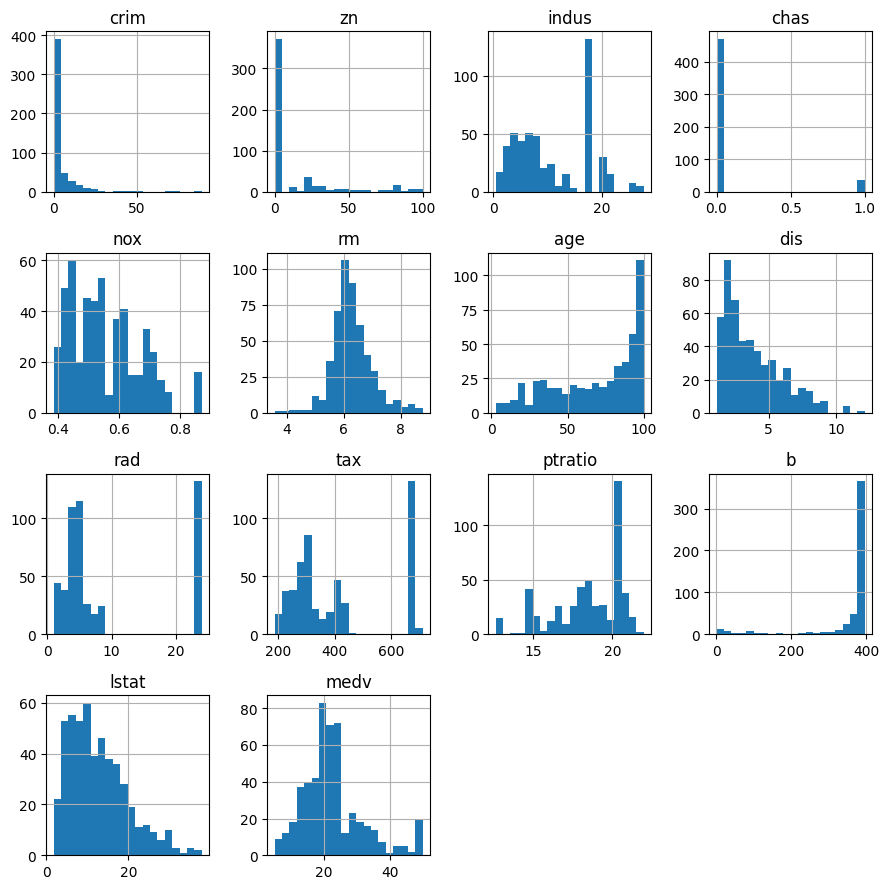

In [5]:
df.hist(bins=20, figsize=(9, 9))
plt.tight_layout()
plt.show()

Skewness tiap fitur:
crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
b         -2.890374
lstat      0.906460
medv       1.108098
dtype: float64


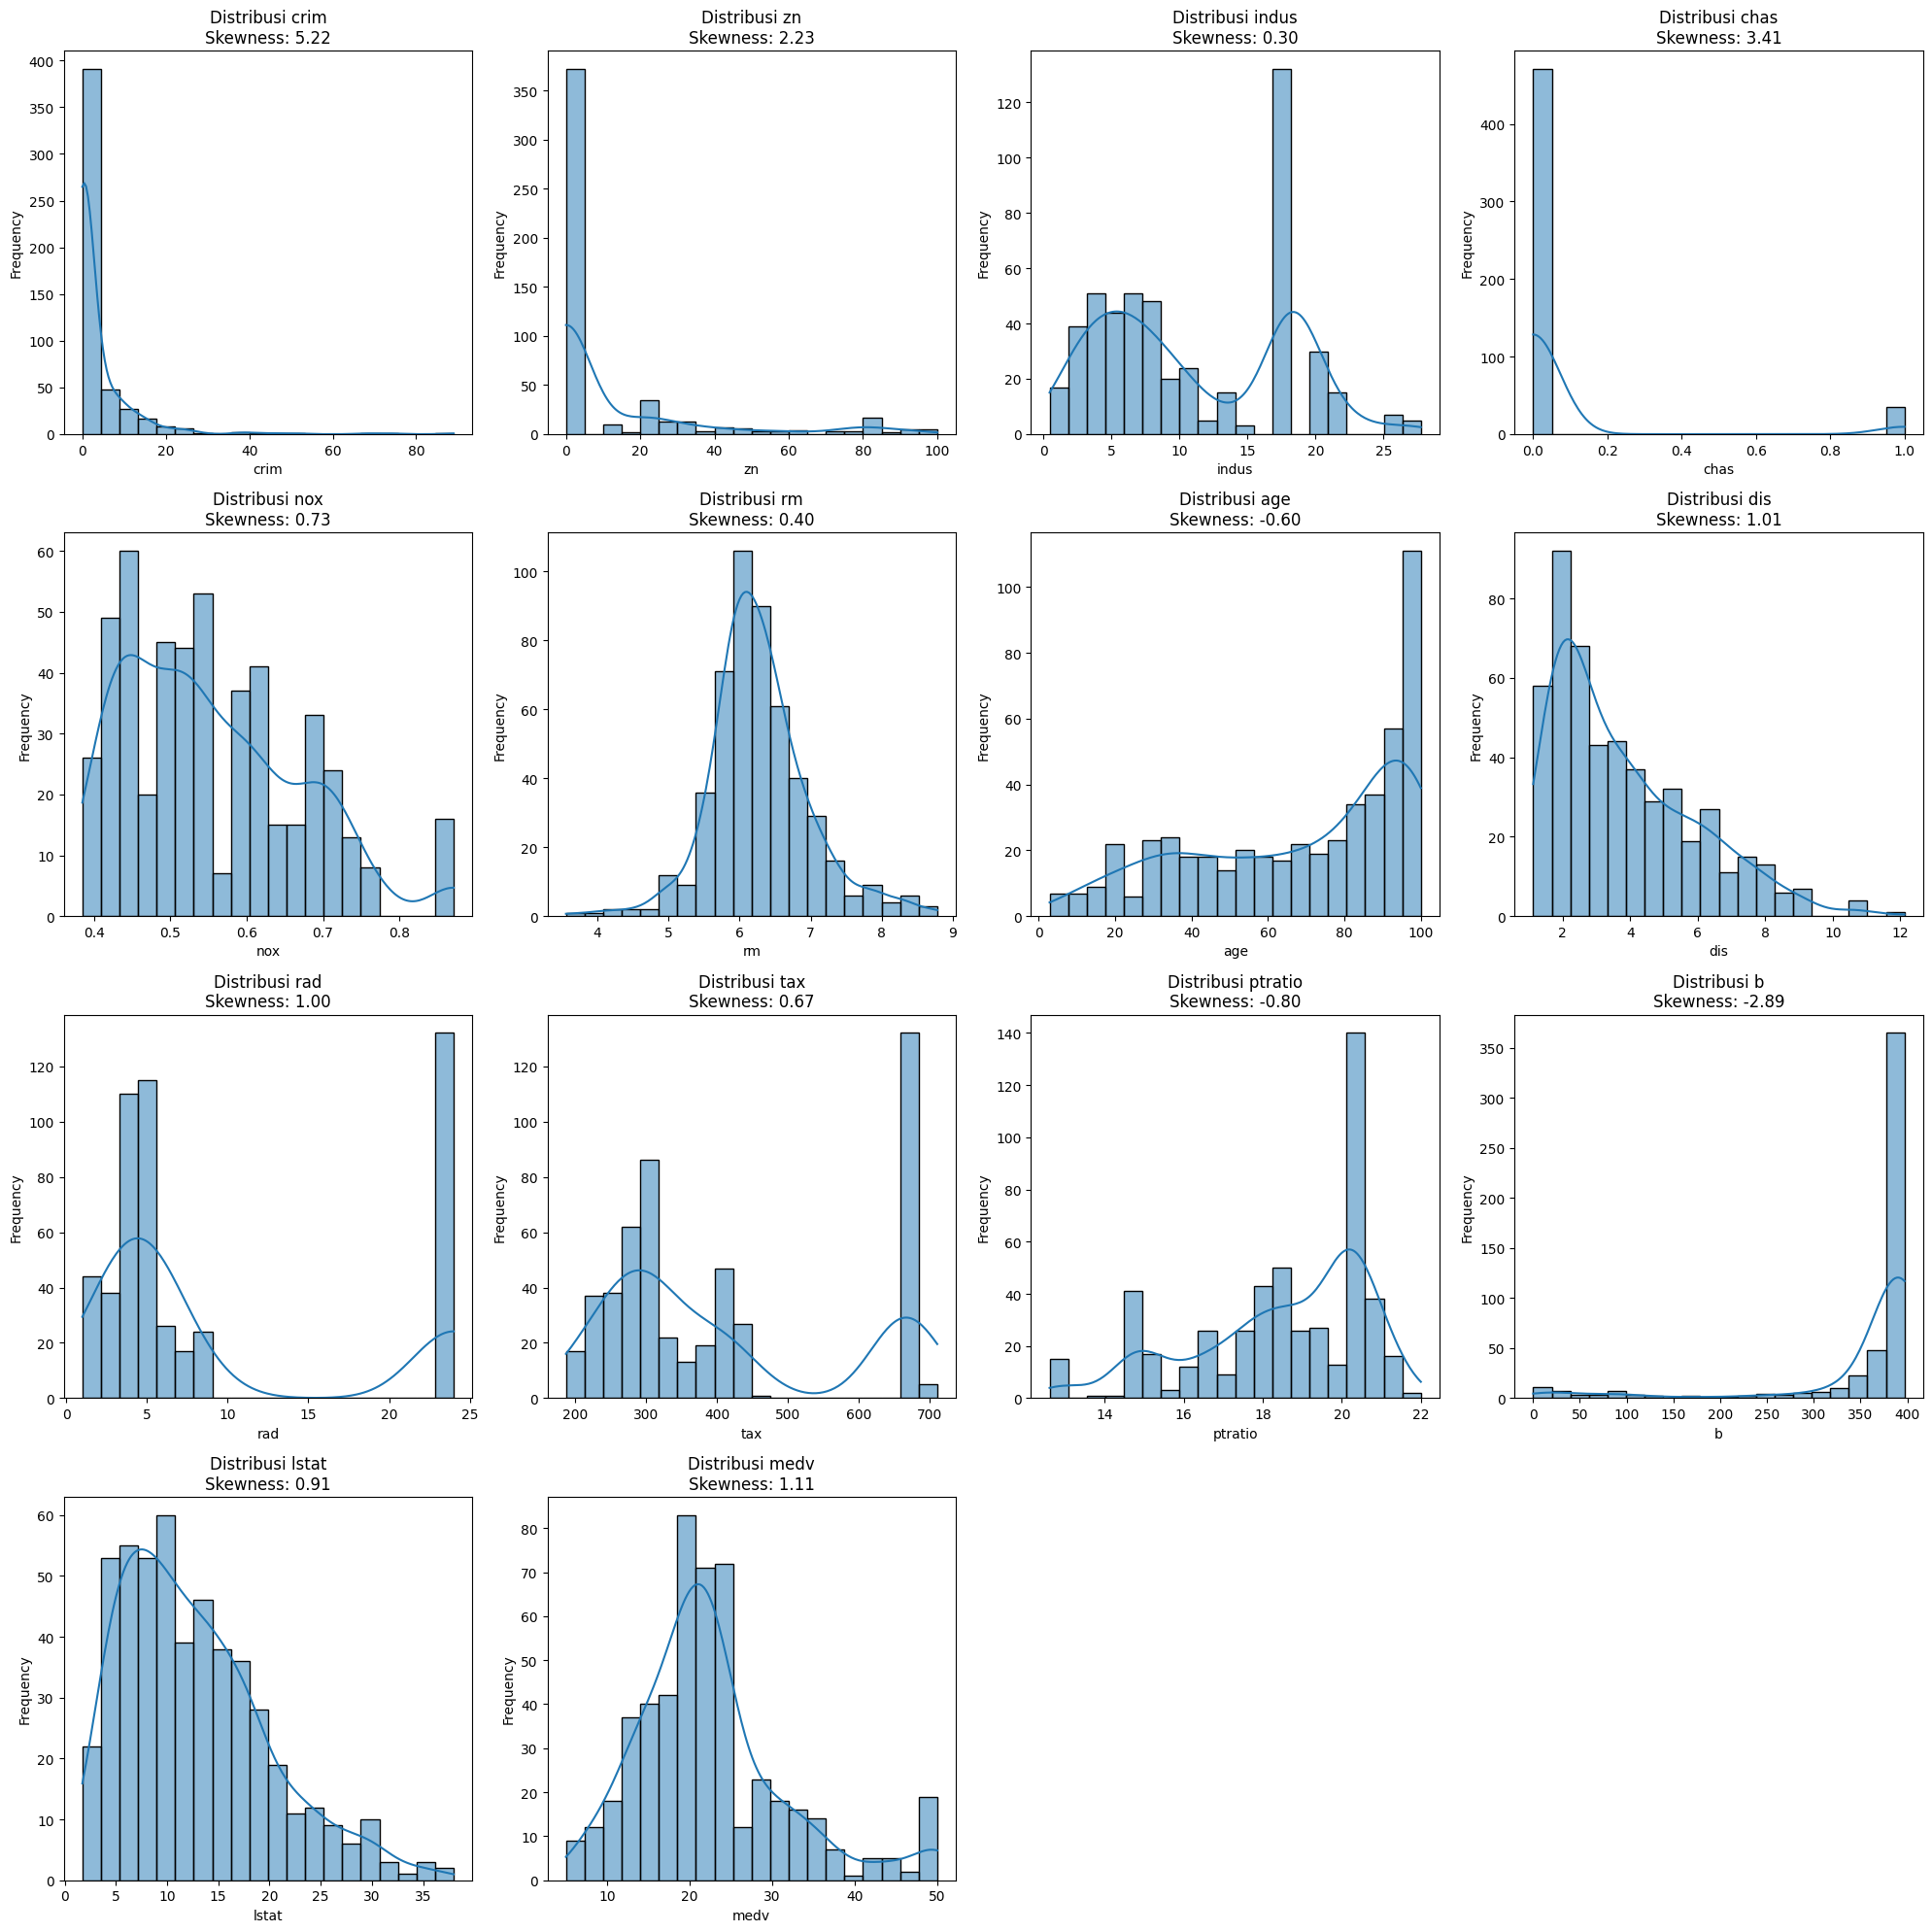

In [6]:
print("Skewness tiap fitur:")
print(df.skew())

# Buat figure dengan grid 4x4
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

# Plot tiap fitur di subplot yang udah disediakan
for ax, col in zip(axes, df.columns):
    sns.histplot(df[col], kde=True, bins=20, ax=ax)
    ax.set_title(f'Distribusi {col}\nSkewness: {df[col].skew():.2f}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Matikan subplot yang kosong kalo fitur kurang dari 16
if len(df.columns) < len(axes):
    for ax in axes[len(df.columns):]:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [7]:
import numpy as np

# Contoh transformasi log untuk fitur dengan positive skew
df['crim_log'] = np.log1p(df['crim'])
df['zn_log']   = np.log1p(df['zn'])
df['chas_log'] = np.log1p(df['chas'])  # meskipun chas itu dummy, tapi nilainya skewed karena ketidakseimbangan

# Untuk fitur dengan negative skew, lo bisa coba transformasi Yeo-Johnson
from scipy import stats
df['b_yj'], _ = stats.yeojohnson(df['b'])

# Liat lagi skewnessnya setelah transformasi
print("Skewness setelah transformasi:")
print(df[['crim_log', 'zn_log', 'chas_log', 'b_yj']].skew())

Skewness setelah transformasi:
crim_log    1.269201
zn_log      1.193451
chas_log    3.405904
b_yj       -1.908672
dtype: float64


$$
y^{(\lambda)} =
\begin{cases}
\displaystyle \frac{(y+1)^\lambda - 1}{\lambda}, & \text{if } y \ge 0 \text{ and } \lambda \neq 0, \\[10pt]
\log(y+1), & \text{if } y \ge 0 \text{ and } \lambda = 0, \\[10pt]
-\displaystyle \frac{(-y+1)^{2-\lambda} - 1}{2-\lambda}, & \text{if } y < 0 \text{ and } \lambda \neq 2, \\[10pt]
-\log(-y+1), & \text{if } y < 0 \text{ and } \lambda = 2.
\end{cases}
$$


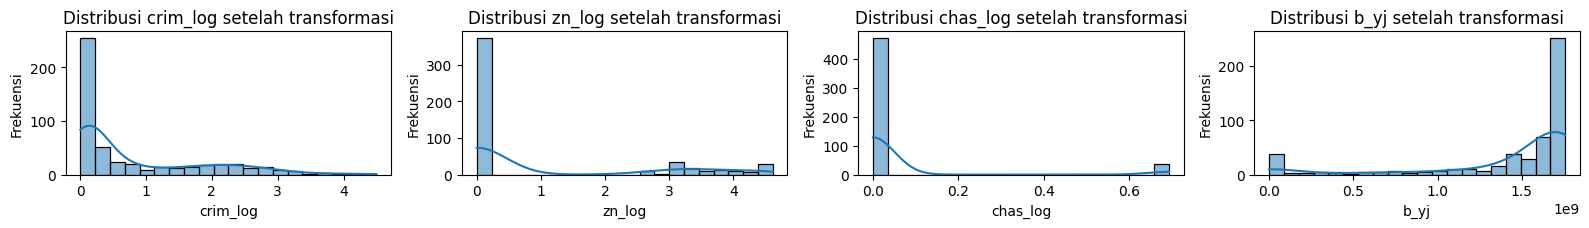

In [8]:
transformed_features = ['crim_log', 'zn_log', 'chas_log', 'b_yj']

fig, axes = plt.subplots(4, 4, figsize=(16, 8))  # 4x4 grid, total 16 subplot
axes = axes.flatten()

# Looping buat plot tiap fitur
for i, feature in enumerate(transformed_features):
    sns.histplot(df[feature], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature} setelah transformasi')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frekuensi')

# Hapus axes yang gak kepake (biar gak nampilin plot kosong)
for j in range(i + 1, 16):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Copy dataset dan replace fitur asli dengan transformasi yang udah dibuat
df_model = df.copy()
df_model['crim'] = df_model['crim_log']
df_model['zn']   = df_model['zn_log']
df_model['chas'] = df_model['chas_log']
df_model['b']    = df_model['b_yj']

# Misal targetnya tetap 'medv'
X = df_model.drop(['medv', 'crim_log', 'zn_log', 'chas_log', 'b_yj'], axis=1)
y = df_model['medv']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 24.950581042460257


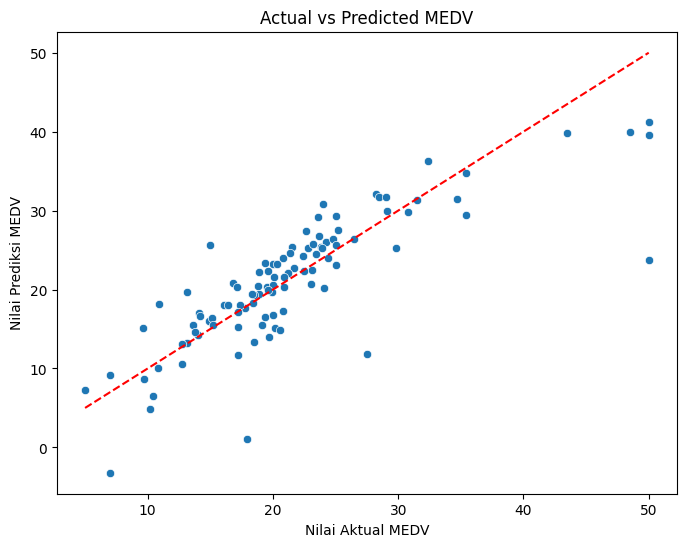

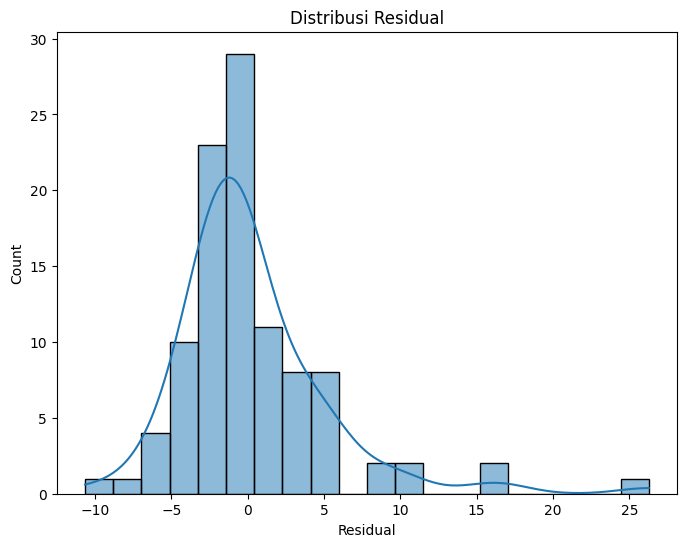

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # line perfect prediction
plt.show()

# Visualisasi distribusi residual
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residual")
plt.title("Distribusi Residual")
plt.show()

#SOAL NO 1

#LOG TRANSFORM

In [11]:
# Load dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

In [12]:
# Log Transform untuk fitur yang memiliki skewness tinggi
df['crim_log'] = np.log1p(df['crim'])
df['zn_log'] = np.log1p(df['zn'])
df['indus_log'] = np.log1p(df['indus'])
df['nox_log'] = np.log1p(df['nox'])
df['rm_log'] = np.log1p(df['rm'])
df['tax_log'] = np.log1p(df['tax'])
df['b_log'] = np.log1p(df['b'])



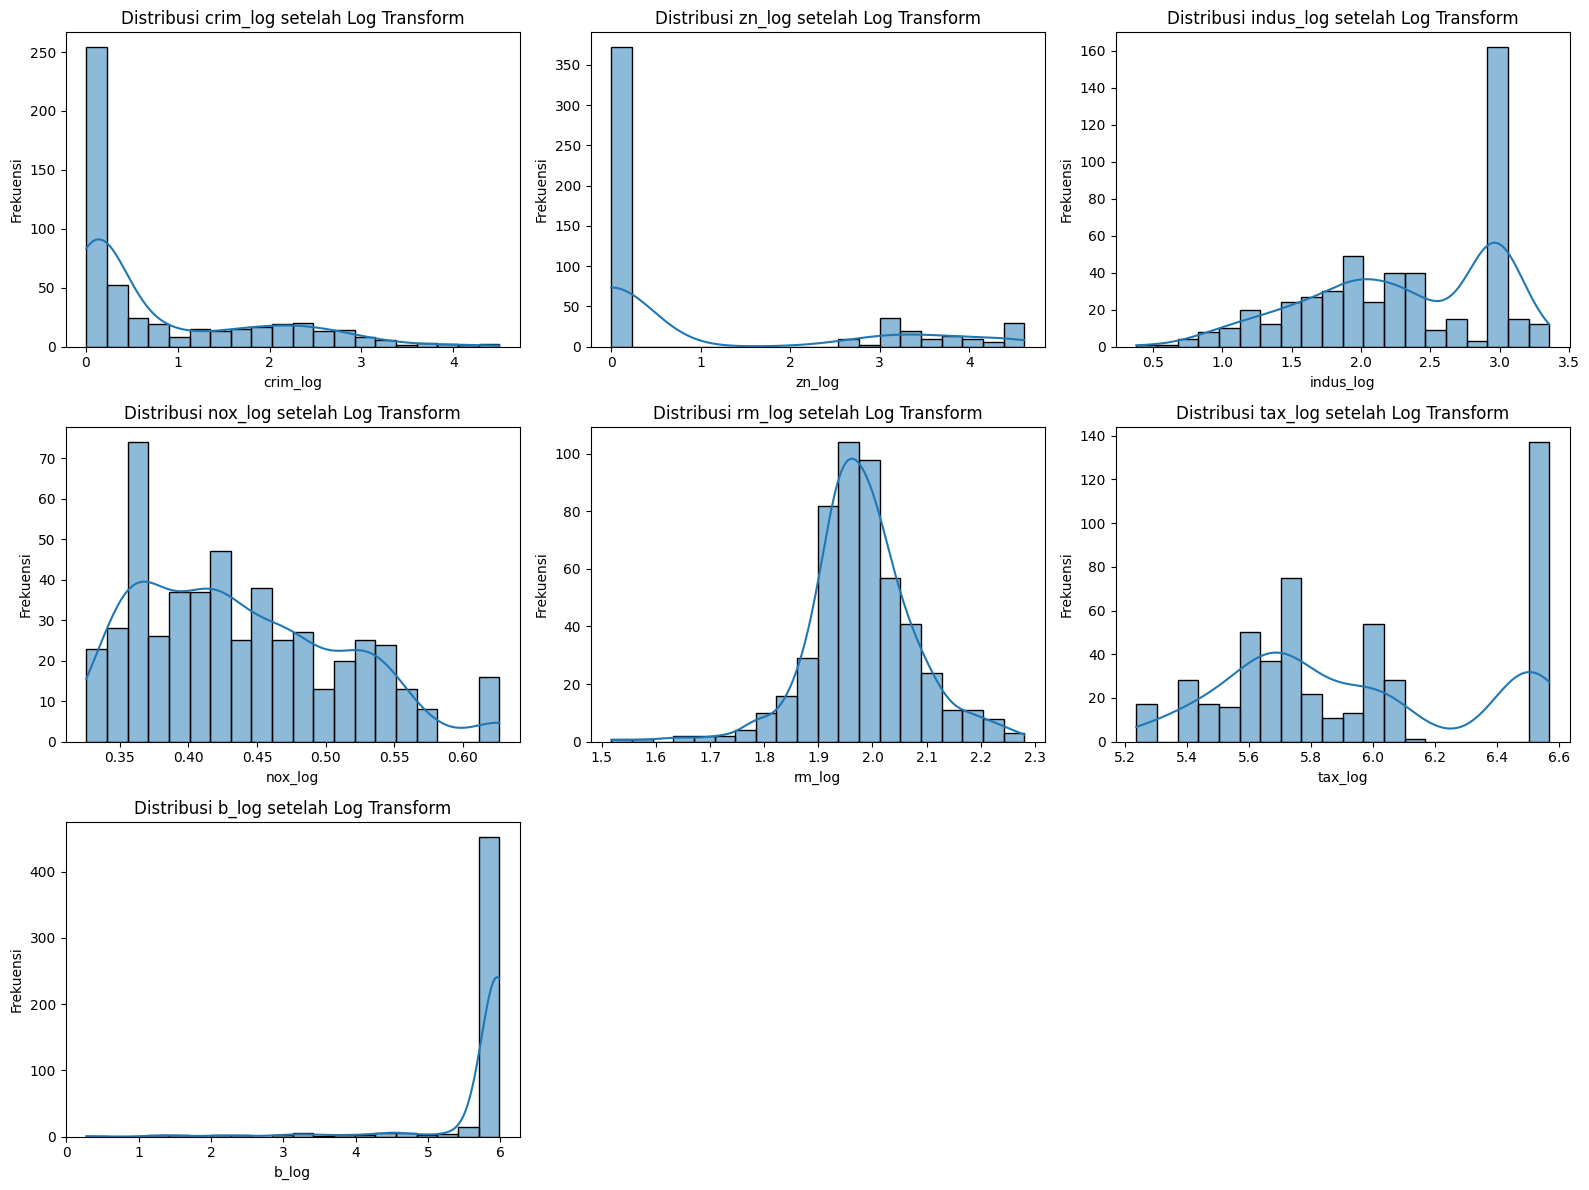

In [13]:
transformed_features = ['crim_log', 'zn_log', 'indus_log', 'nox_log', 'rm_log', 'tax_log', 'b_log']

# Visualisasi distribusi fitur setelah transformasi
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(transformed_features):
    sns.histplot(df[feature], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature} setelah Log Transform')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frekuensi')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [14]:
# Copy dataset dan replace fitur asli dengan transformasi yang sudah dibuat
df_model = df.copy()
df_model['crim'] = df_model['crim_log']
df_model['zn'] = df_model['zn_log']
df_model['indus'] = df_model['indus_log']
df_model['nox'] = df_model['nox_log']
df_model['rm'] = df_model['rm_log']
df_model['tax'] = df_model['tax_log']
df_model['b'] = df_model['b_log']

In [15]:
# Misal targetnya tetap 'medv'
X = df_model.drop(['medv', 'crim_log', 'zn_log', 'indus_log', 'nox_log', 'rm_log', 'tax_log', 'b_log'], axis=1)
y = df_model['medv']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 24.573826616778444


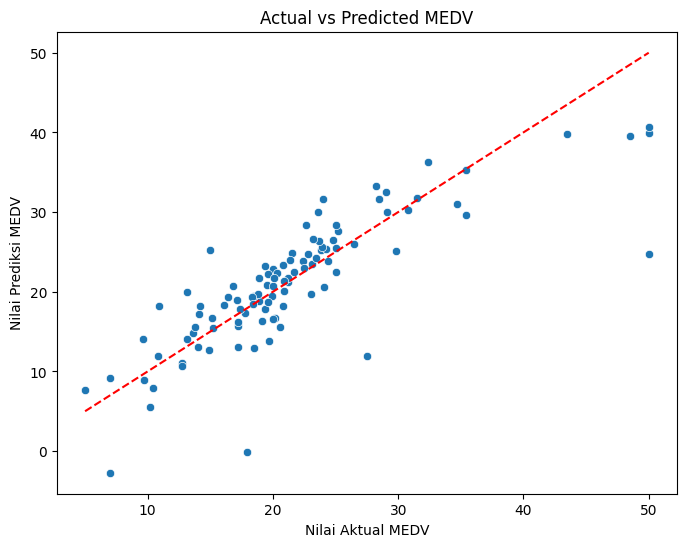

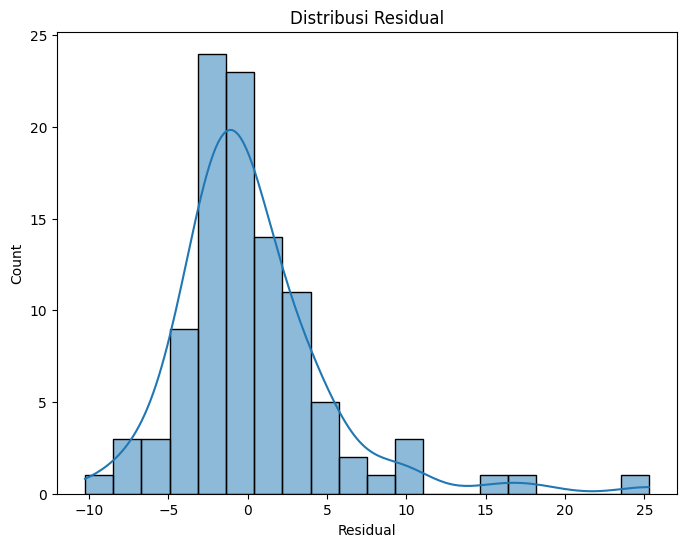

In [16]:
# Visualisasi Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line perfect prediction
plt.show()

# Visualisasi distribusi residual
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residual")
plt.title("Distribusi Residual")
plt.show()

#BOX-COX TRANSFORM

In [17]:
# Load dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)


In [18]:
# Cek skewness sebelum transformasi
print("Skewness sebelum transformasi:")
print(df.skew())

Skewness sebelum transformasi:
crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
b         -2.890374
lstat      0.906460
medv       1.108098
dtype: float64


In [19]:
# List fitur yang akan ditransformasikan
features_to_transform = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']


In [20]:
# Tambahkan shift jika ada nilai <= 0 untuk memastikan nilai positif
for feature in features_to_transform:
    if (df[feature] <= 0).any():
        shift = abs(df[feature].min()) + 1  # Shift agar semua nilai menjadi positif
        df[feature] = df[feature] + shift

    df[f'{feature}_boxcox'], _ = stats.boxcox(df[feature])

In [21]:
# Cek skewness setelah transformasi
transformed_features = [f'{feature}_boxcox' for feature in features_to_transform]
print("Skewness setelah transformasi:")
print(df[transformed_features].skew())

Skewness setelah transformasi:
crim_boxcox       0.093649
zn_boxcox         1.071695
indus_boxcox     -0.133737
nox_boxcox        0.060947
rm_boxcox         0.037051
age_boxcox       -0.425141
dis_boxcox        0.028653
rad_boxcox        0.017430
tax_boxcox        0.079204
ptratio_boxcox   -0.222924
b_boxcox         -1.931635
lstat_boxcox     -0.027886
dtype: float64


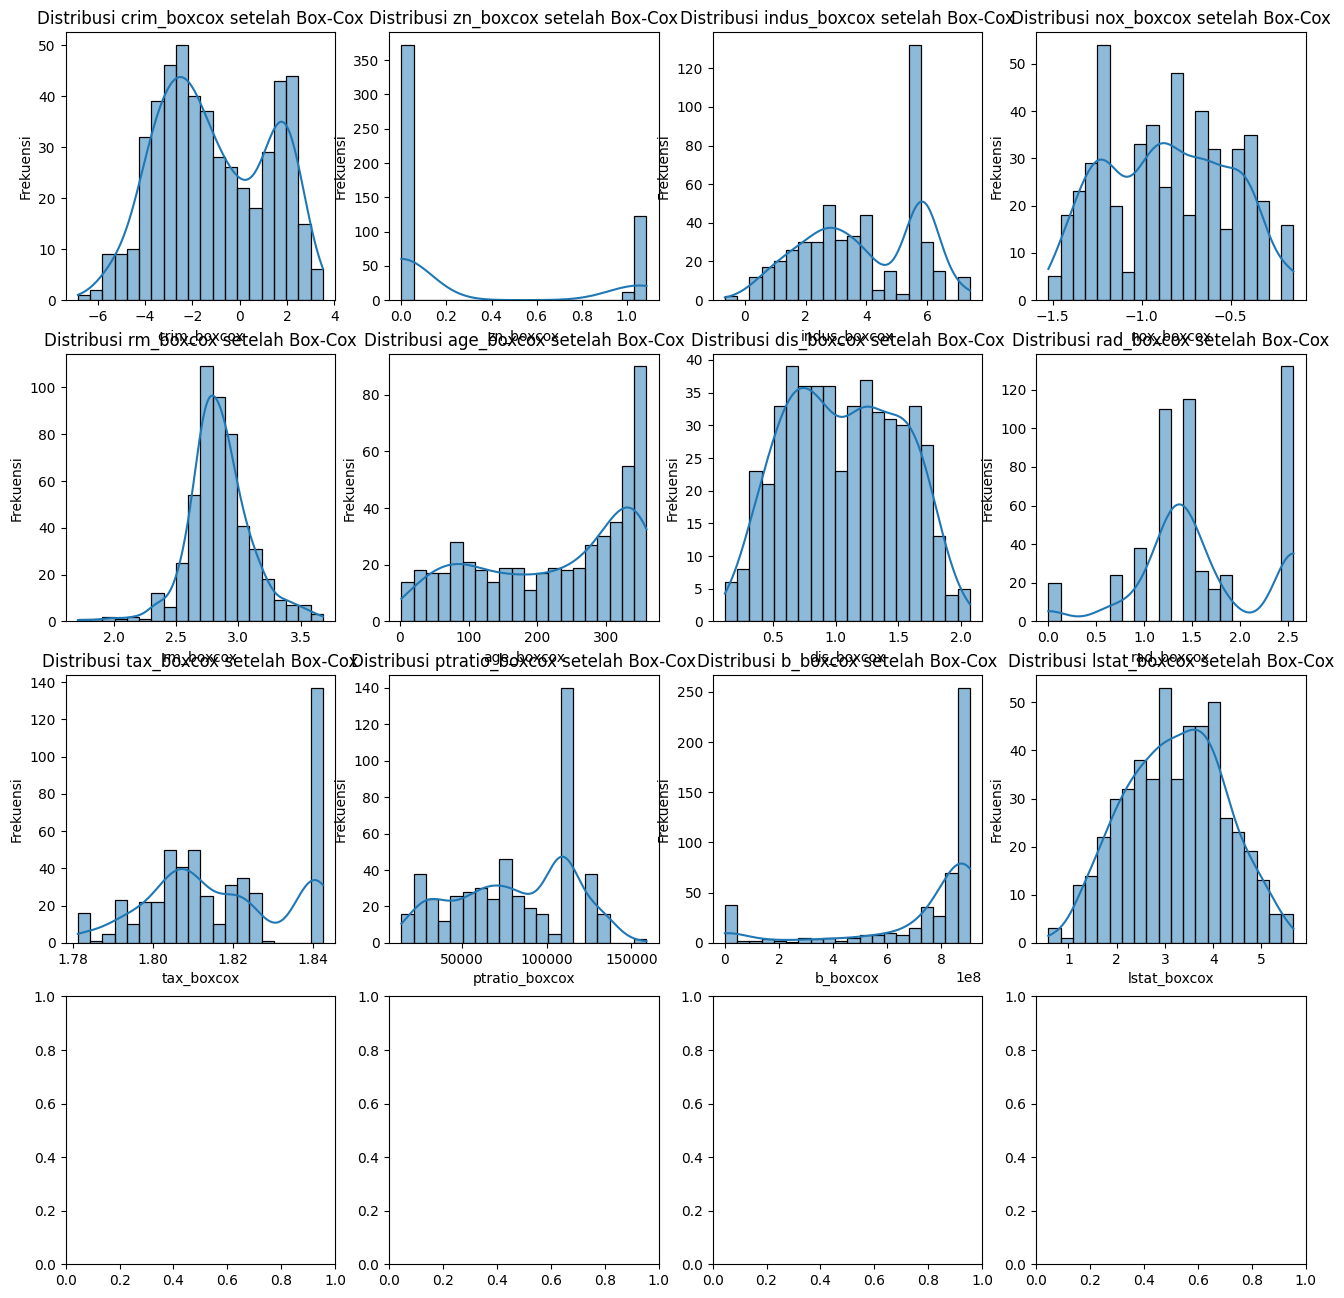

In [22]:
# Visualisasi distribusi fitur setelah transformasi
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
axes = axes.flatten()

for i, feature in enumerate(transformed_features):
    sns.histplot(df[feature], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature} setelah Box-Cox')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frekuensi')

In [23]:
# Hapus subplot yang kosong jika fitur kurang dari 16
for j in range(i + 1, 16):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [24]:
# Model dengan fitur yang sudah ditransformasi
df_model = df.copy()
for feature in features_to_transform:
    df_model[feature] = df_model[f'{feature}_boxcox']
    df_model.drop(columns=[f'{feature}_boxcox'], inplace=True)

# Misal targetnya tetap 'medv'
X = df_model.drop(['medv'], axis=1)
y = df_model['medv']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error setelah Box-Cox Transform:", mse)

Mean Squared Error setelah Box-Cox Transform: 19.680473539923447


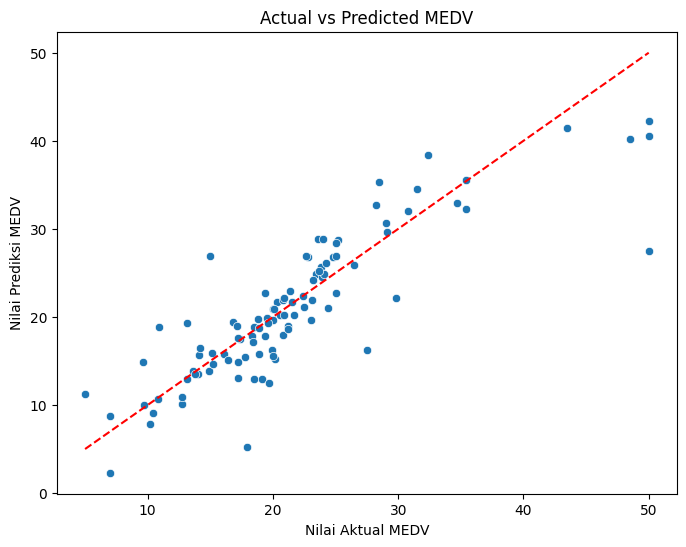

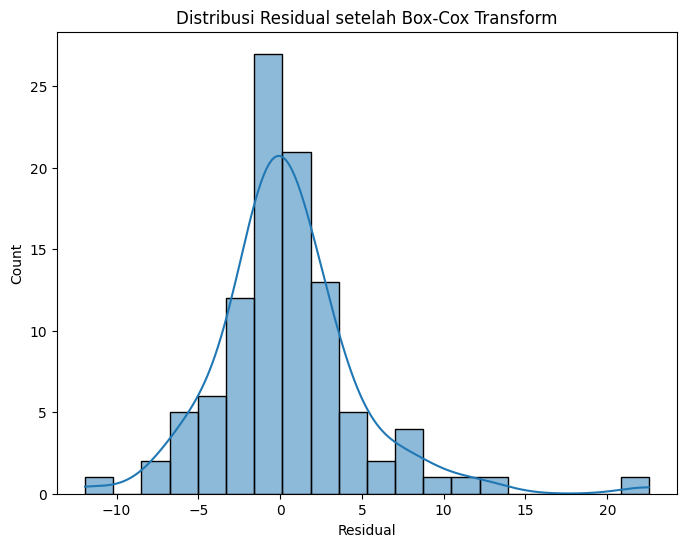

In [25]:
# Visualisasi Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Visualisasi distribusi residual
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residual")
plt.title("Distribusi Residual setelah Box-Cox Transform")
plt.show()


#QUANTILE TRANSFORM

In [26]:
from sklearn.preprocessing import QuantileTransformer
# Load dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

In [27]:
# Terapkan Quantile Transform ke fitur yang memiliki skewness tinggi
qt = QuantileTransformer(output_distribution='normal', random_state=42)
df[['crim_qt', 'zn_qt', 'chas_qt', 'b_qt']] = qt.fit_transform(df[['crim', 'zn', 'chas', 'b']])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  warnings.warn(


In [28]:
# Lihat skewness setelah transformasi
print("Skewness setelah transformasi:")
print(df[['crim_qt', 'zn_qt', 'chas_qt', 'b_qt']].skew())

Skewness setelah transformasi:
crim_qt    0.000025
zn_qt      1.112366
chas_qt    3.405904
b_qt       0.951123
dtype: float64


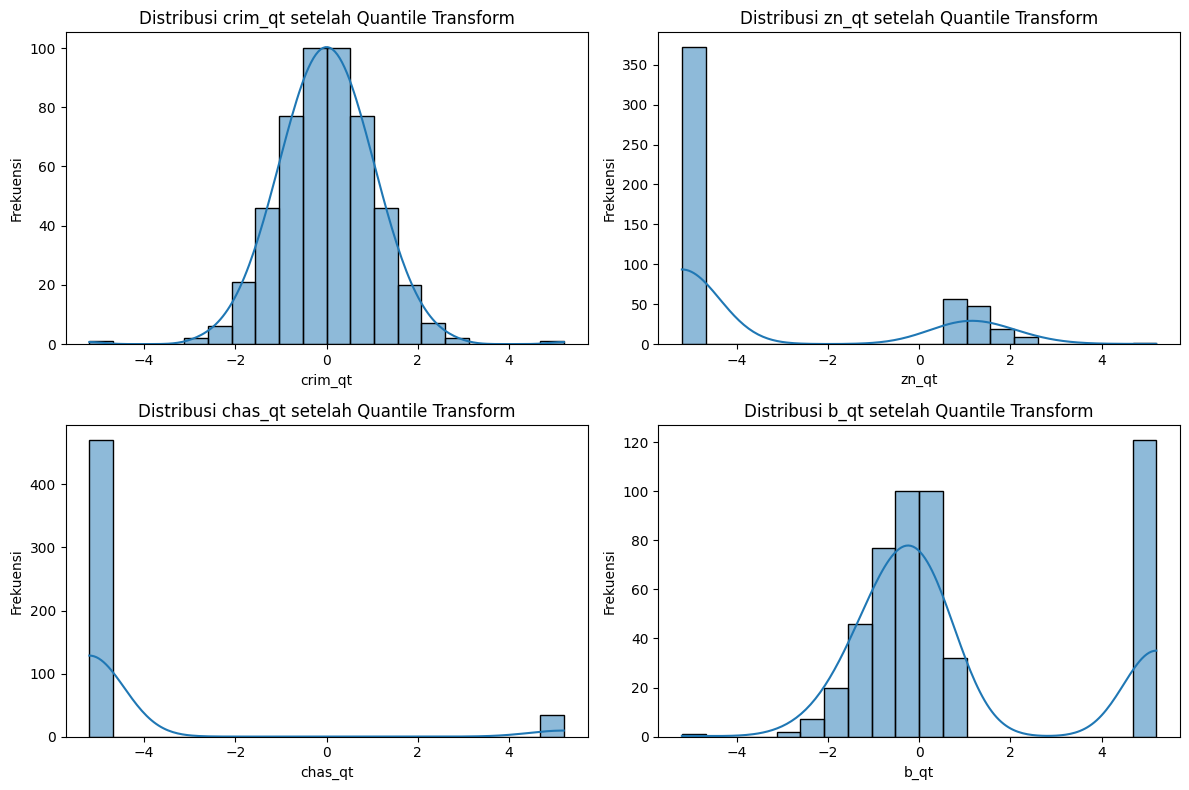

In [29]:
# Visualisasi distribusi setelah transformasi
transformed_features = ['crim_qt', 'zn_qt', 'chas_qt', 'b_qt']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(transformed_features):
    sns.histplot(df[feature], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature} setelah Quantile Transform')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()


In [30]:
# Gunakan data yang telah ditransformasi dalam model

df_model = df.copy()
df_model['crim'] = df_model['crim_qt']
df_model['zn']   = df_model['zn_qt']
df_model['chas'] = df_model['chas_qt']
df_model['b']    = df_model['b_qt']


In [31]:
# Misal targetnya tetap 'medv'
X = df_model.drop(['medv', 'crim_qt', 'zn_qt', 'chas_qt', 'b_qt'], axis=1)
y = df_model['medv']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 24.12373792178692


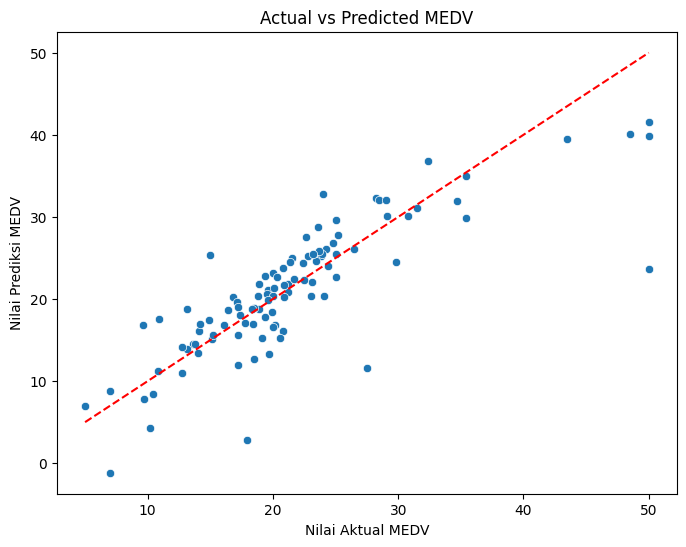

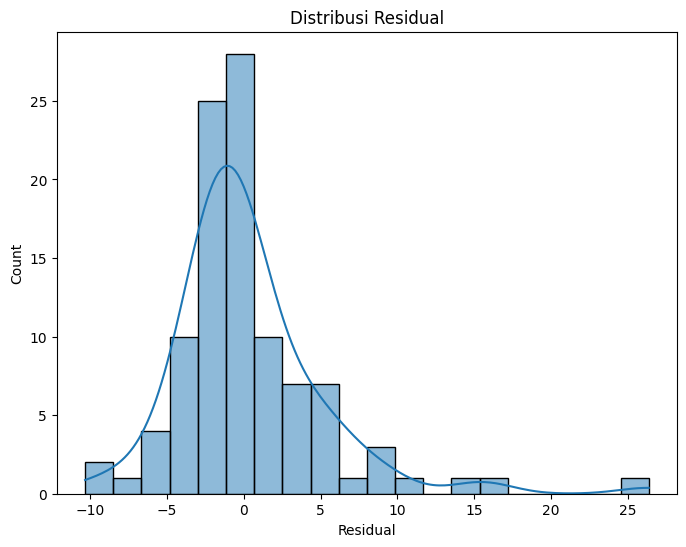

In [32]:
# Visualisasi Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # line perfect prediction
plt.show()

# Visualisasi distribusi residual
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residual")
plt.title("Distribusi Residual")
plt.show()


kesimpulan:
  - Nilai MSE:
    - Yeo-johnson = 24.95
    - Log Transformed = 24.57
    - Box-Cox transformed = 19.68
    - Quantile Transformed = 24.12
  - Berdasarkan 4 perbandingan dari transformasi data diatas bisa dilihat bahwa penggunaan model Box-Cox transformed lebih cocok digunakan dibandingkan dengan model lainnya untuk dataset ini. hal ini bisa dilihat dari nilai mse dari Log Transformed lebih kecil dibandingkan dengan model lainnya. namun perlu digaris bawahi nilai mse yang terlalu kecil juga tidak bagus, karena bisa jadi model tersebut overfitting terhadap dataset yang membuatnya tidak dapat mempelajari data baru.

#SOAL NO 2

#MinMax Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

In [34]:
# Pisahkan fitur dan target
X = df.drop(columns=['medv'])  # Semua fitur kecuali target
y = df['medv']  # Target


In [35]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [53]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Hitung R² score

print("Mean Squared Error setelah Standard Scaling:", mse)
print("R² Score (Akurasi Model):", r2)

Mean Squared Error setelah Standard Scaling: 24.291119474973584
R² Score (Akurasi Model): 0.6687594935356311


#STANDARD SCALING

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
# Load dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score  # Tambahkan r2_score

# Copy dataset dan replace fitur asli dengan transformasi yang udah dibuat
df_model = df.copy()
df_model['crim_log'] = df_model['crim']
df_model['zn_log']   = df_model['zn']
df_model['chas_log'] = df_model['chas']
df_model['b_yj']    = df_model['b']


In [50]:
# Misal targetnya tetap 'medv'
X = df_model.drop(['medv', 'crim', 'zn', 'chas', 'b'], axis=1)
y = df_model['medv']

In [51]:
# Terapkan Standard Scaling ke fitur X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Hitung R² score

print("Mean Squared Error setelah Standard Scaling:", mse)
print("R² Score (Akurasi Model):", r2)

Mean Squared Error setelah Standard Scaling: 24.291119474973584
R² Score (Akurasi Model): 0.6687594935356311


#ROBUST SCALING

In [44]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score

# Copy dataset
X = df_model.drop(['medv', 'crim_log', 'zn_log', 'chas_log', 'b_yj'], axis=1)
y = df_model['medv']

In [45]:
# Terapkan Robust Scaling
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score (Akurasi):", r2)


Mean Squared Error: 24.291119474973513
R² Score (Akurasi): 0.668759493535632


Kesimpulan:
  - Pada kodingan diatas bisa dilihat bahwa melakukan normalisasi data dan standarisasi data dapat memperkecil nilai mse meskipun tidak signifikan.
  - Sayangnya tiga metode yang sudah dicoba, semuanya memiliki nilai yang sama yakni 24.29(mse) dengan akurasi 0.6687. Artinya pergantian dari 3 metode tersebut tidak berpengaruh terhadap nilai mse dan akurasinya.

#SOAL NO 3

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

In [55]:
# Copy dataset untuk transformasi
df_model = df.copy()

# Fitur yang akan didiscretisasi
num_features = df_model.drop(columns=['medv']).columns  # Semua fitur kecuali target

# Terapkan KBinsDiscretizer dengan strategi 'uniform' (jumlah bin = 5)
binner = KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy='uniform')

# One-hot encoding setelah discretization
encoder = OneHotEncoder(handle_unknown='ignore')

# Pipeline untuk melakukan discretization dan one-hot encoding
preprocessor = ColumnTransformer([
    ('binner', binner, num_features)
])

# Transformasikan fitur numerik menjadi kategori
X_binned = preprocessor.fit_transform(df_model.drop(columns=['medv']))
y = df_model['medv']  # Target tetap

In [56]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_binned, y, test_size=0.2, random_state=42)

# Training model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error setelah Discretization:", mse)
print("R² Score setelah Discretization:", r2)


Mean Squared Error setelah Discretization: 18.55398276967577
R² Score setelah Discretization: 0.7469926959977928


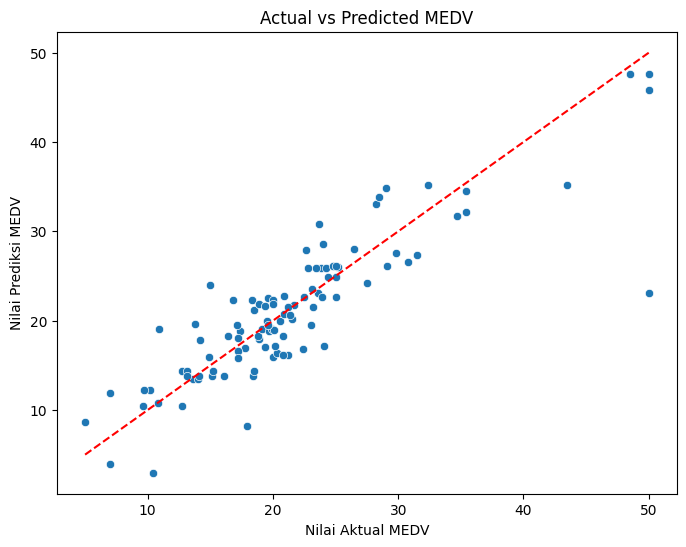

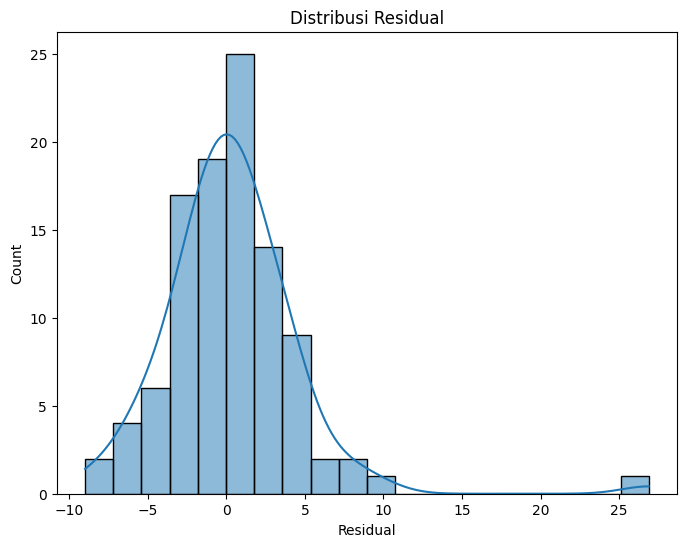

In [57]:
# Visualisasi Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.show()

# Visualisasi distribusi residual
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residual")
plt.title("Distribusi Residual")
plt.show()

Kesimpulan:
 - Kontinu:
  - mse = 24.95

- discretisasi:
  - mse = 18.55
  - R^2 = 0.7469

- Dari data diatas bisa dilihat bahwa penggunaan discretisasi pada model diatas dapat menurunkan nilai mse yang secara otomatis juga meningkatkan nilai akurasinya.

# Question!

1. Pada model di atas menggunakan transformasi data Yeo-Johnson. Eksplorasi transformasi data lainnya seperti Log Transform, Box-Cox Transform, atau Quantile Transform. Lakukan pembuatan model dengan masing-masing transformasi dan bandingkan hasilnya!

2. Lakukan eksplorasi terhadap metode normalisasi dan standardisasi data. Bandingkan metode MinMax Scaling, Standard Scaling, dan Robust Scaling dalam konteks data yang mengandung outlier. Bagaimana dampaknya terhadap akurasi model!

3. Pada model sebelumnya, fitur numerik langsung digunakan tanpa encoding. Eksplorasi apakah melakukan discretization pada fitur numerik dapat meningkatkan performa model, dibandingkan dengan tetap menggunakan fitur dalam bentuk kontinu.

# Penjelasan Pertanyaan diatas dengan lebih mendetail

---

## 1. Transformasi Data

**Deskripsi:**  
Pada model di atas digunakan transformasi data Yeo-Johnson.

**Tugas:**  
Eksplorasi transformasi data alternatif seperti **Log Transform**, **Box-Cox Transform**, dan **Quantile Transform**.

**Langkah Kerja:**  
- Lakukan pembuatan model dengan masing-masing metode transformasi.  
- Bandingkan hasil performa model yang dihasilkan dari tiap metode.

---

## 2. Normalisasi dan Standardisasi Data

**Deskripsi:**  
Metode normalisasi dan standardisasi perlu dieksplorasi, terutama pada data yang mengandung outlier.

**Tugas:**  
Bandingkan metode **MinMax Scaling**, **Standard Scaling**, dan **Robust Scaling**.

**Langkah Kerja:**  
- Terapkan masing-masing metode pada dataset yang mengandung outlier.  
- Analisis dan evaluasi dampak dari masing-masing metode terhadap akurasi model.

---

## 3. Discretization pada Fitur Numerik

**Deskripsi:**  
Pada model sebelumnya, fitur numerik digunakan dalam bentuk kontinu tanpa encoding.

**Tugas:**  
Eksplorasi apakah melakukan **discretization** pada fitur numerik dapat meningkatkan performa model.

**Langkah Kerja:**  
- Ubah fitur numerik menjadi bentuk kategori melalui teknik discretization.  
- Lakukan pelatihan model dengan fitur yang telah didiscretisasi.  
- Bandingkan performa model dengan model yang menggunakan fitur kontinu.

---